##### Author contributions
Please fill out for each of the following parts who contributed to what:
- Conceived ideas: Ajinkya, Miriam, Nienke, Roel
- Performed math exercises: Ajinkya, Miriam, Nienke, Roel
- Performed programming exercises: Ajinkya, Miriam, Nienke, Roel
- Contributed to the overall final assignment: Ajinkya, Miriam, Nienke, Roel

# Chapter 5
## Autoencoder

    Hand-in bug-free (try "Kernel" > "Restart & Run All") and including all (textual as well as figural) output via Brightspace before the deadline (see Brightspace).
    
Learning goals:
1. Derive and implement the mean-squared-error loss function and the rectified linear activation function
1. Implement an autoencoder as a neural network with unsupervised learning
1. Check what face features the autoencoder has learned to encode in the hidden units

### Notes on the architecture

The autoencoder network that you are about to implement has the same structure as in the MLP exercise: The input, hidden, and output node layers are connected with two weight layers. This time, the $n_h$ hidden layer nodes use a *rectified linear* activation function, and the output units use *linear* activations. 

Note that an autoencoder performs regresson, not to be confused with classification in the previous assignment. Also note that an autoencoder is nothing more than a multilayer perceptron, where the targets ($T$) are equal to the inputs ($X$). 

The data set is the Yale Face Database, which is a small set of grayscale photos of faces, each showing a different facial expression. The autoencoder will have as many input and output units as there are pixels. The hidden layer has far less units, as our goal is to learn a compressed representation of faces. The autoencoders job is "learning to reconstruct", that is, learning to reconstruct the face at the input units in the output units, after passing the information through the hidden units. Basically this means that `X` and `Y` are equal here. 

### Exercise 1: Mean squared error (1 point)

As we want to predict pixel values we have a regression problem, and MSE is a convenient loss function for regression problems. MSE is large when the prediction is off, and near zero when the prediction is most similar to the target. The mean squared error (MSE) is given by:
$$L = \frac{1}{2N} \sum^N_n \sum^K_k (t^{(n)}_k - y^{(n)}_k)^2$$
Here, $t^{(n)}_k$ is the target and $y^{(n)}_k$ the prediction of the $n$th data example and $k$th output unit. 

We need the derivative of the MSE with respect to $y$ to do gradient descent (i.e., backpropagation) to tweak the parameters (i.e., the weights) for regression. Derive the MSE with respect to $y$, i.e. derive $\frac{\partial L}{\partial y}$. You can ignore the batch index $n$ (i.e., derive with $N = 1$).

### Solution 1: 
For $N=1$, our formula $L$ becomes $L = \frac{1}{2} \sum ^K_k (t^{(1)}_k - y^{(1)}_k)^2$. We do not write down the upper index because it is cumbersome and clutters the notation, so we will work with $L = \frac{1}{2} \sum ^K_k (t_k - y_k)^2$.

For an $y_k$, the derivative $\frac{\partial L}{\partial y_k}$ becomes $\frac{1}{2} \cdot 2 \cdot (t_k - y_k) \cdot -1 = -(t_k - y_k) = y_k - t_k$

### Exercise 2: The rectified linear unit activation function (ReLU) (1 point)
The rectified linear activation function is given by:
$$f(a) = max(0, a)$$

Obtain its derivative $\frac{\partial f}{\partial a}$. 

Hint: It is a simple conditional expression (two cases).

### Solution 2:
$\frac{\partial f}{\partial a} = \begin{cases} 1 &\mbox{if } a > 0 \\
0 & \mbox{if } a \leq 0 \end{cases}$

### Exercise 3: The forward pass (1 point)
The network is defined as having two layers $W^1$ and $W^2$, where $W^1$ connects the input $x$ with the hidden layer $h$, and $W^2$ connects the hidden layer $h$ with the output layer $y$. For the hidden layer, we use rectified linear units with the activation function $f(a) = max(0, a)$. The output layer is just a linear layer (with the linear activation function $g(a) = a$). Write down the expressions for $a^1$, $h$, $a^2$, and $y$, where $a^1$ and $a^2$ are the activities of the hidden and output layer before passing them through the rectified linear and linear activations, respectively.

### Solution 3:
$\LaTeX$ here.

\begin{eqnarray*}
a^1 &=&  W^1 \cdot x\\
h &=& f(a^1) =  max(0, a^1) \\
a^2 &=& W^2 \cdot h \\
y &=& g(a^2) = a^2
\end{eqnarray*}

### Exercise 4: Gradient of the last layer (1 point)
To compute the partial derivatives on the weights $W^2$ of the last layer, we have to propagate from the error function back through the non-linearity to the weights. Derive the chain of partial derivatives to compute $\frac{\partial L}{\partial W^2_{ij}}$.

### Solution 4
$\frac{\partial L}{\partial W^2_{ij}} = \frac{\partial L}{\partial y_i} \cdot \frac{\partial y_i}{\partial a_i^2} \cdot \frac{\partial a_i^2}{\partial W_{ij}^2} = (y_i - t_i) \cdot 1 \cdot h_j = (y_i - t_i) \cdot h_j$

### Exercise 5: Gradient of the first layer (1 point)
To compute the partial derivatives on the weights $W^1$ of the first layer, we have to propagate the error even further down the network. Derive the chain of partial derivatives to compute $\frac{\partial L}{\partial W^1_{ij}}$.

Due do the derivative of the rectified linear activation, which is a conditional expression; you will end up with a conditional expression here too:

\begin{eqnarray*}
\frac{\partial L}{\partial W^1_{ij}} &=& 
\begin{cases}
    ?, & \text{if } a^1 > 0 \\
    ?, & \text{otherwise}
\end{cases}
\end{eqnarray*}

### Solution 5
$\frac{\partial L}{\partial W^1_{ij}} = \frac{\partial L}{y_j} \cdot \frac{\partial y_j}{\partial a_j^2} \cdot \frac{\partial a_j^2}{\partial h_i} \cdot \frac{\partial h_i}{\partial a_i^1} \cdot \frac{\partial a_i^1}{\partial W_{ij}^1} $

$= (y_j - t_j) \cdot 1 \cdot W_{ji}^2 \cdot \frac{\partial h_i}{\partial a_i^1} \cdot x_j$

\begin{eqnarray*}
\frac{\partial L}{\partial W^1_{ij}} &=& 
\begin{cases}
    (y_j - t_j) \cdot W_{ji}^2 \cdot x_j, & \text{if } a^1 > 0 \\
    0, & \text{otherwise}
\end{cases}
\end{eqnarray*}

### Exercise 6: Implementation (2.5 points)
Now we can start implementing the autoencoder. Write the following functions:
1. `mean_squared_error(Y, X)`: Computes the mean squared error. You need to sum over the pixel axis 0, and then mean  the result over the examples.
1. `relu(A)`: Passes the activity `A` through the rectified linear unit. Use [`np.maximum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.maximum.html) to compare each element of A to 0.
1. `linear(X, W)`: Computes the activities `A` as `X` weighted by `W`. Just like in the previous exercises. 
1. `forward(X, W1, W2)`: Computes the forward pass for the two-layer AE with the `relu(A)` function at the hidden units. As the linear activation is just the trivial identity there is no activation function at the output units. Returns `A1`, `H` and `Y`. 
1. `backward(X, A1, H, Y, W2)`: Computes the backward pass for the two-layer AE with ReLU hidden units and MSE. The conditional can be realized by multiplying with the matrix `(A1 > 0).astype('float')`. 
1. `train_network(X_train, X_val, n_hidden, n_epochs, eta)`: Implement the training procedure (train the model on training data, and evaluate on both training and validation data). See the skeleton code for some help. Note that we have supplied a `initialize_weights(n_in, n_out)` function to initialize weights in the range from the MLP assignment. Remember that the input is equal to the output, so we do not need anything but `X_train` for training. 

Feel free to copy some code from the previous exercises.

### Solution 6

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

In [2]:
def initialize_weights(n_in, n_out):
    """
    Initializes a weight matrix.
    INPUT:
        n_in  = [int] number of input units.
        n_out = [int] number of output units
    OUTPUTS
        W = [n_out n_in] the initial weight matrix
    """
    r = np.sqrt(6) / np.sqrt(n_out + n_in)
    return np.random.uniform(-r, r, [n_out, n_in])

In [3]:
def mean_squared_error(Y, X):
    """
    Computes the mean squared error.
    INPUT:
        Y = [P N] output vector for N examples of length P
        X = [P N] target vector for N examples of length P
    OUTPUTS
        L = [flt] the MSE
    """
    L = 1/(2*X.shape[1]) * np.sum(np.square((X-Y)))
    return L

In [4]:
def relu(A):
    """
    Computes the rectified linear activation.
    INPUT:
        A = [K N] activity matrix of K units for N examples
    OUTPUT
        Y = [K N] output matrix of K units for N examples
    """
    Y = np.maximum(0, A)
    return Y

In [5]:
def linear(X, W):
    """
    Computes the activities for a fully connected layer.
    INPUT:
        X = [P N] data matrix of P input units for N examples
        W = [Q P] weight matrix of P inputs to Q outputs
    OUTPUT
        A = [Q N] activity matrix of Q output units for N examples
    """
    A = np.dot(W, X)
    return A

In [6]:
def forward(X, W1, W2):
    """
    Computes the forward pass for a two-layer AE with relu hidden units.
    INPUT
        X  = [P N] data matrix of P inputs for N examples
        W1 = [Q P] weight matrix of the first layer from P input pixels to Q outputs
        W2 = [P Q] weight vector of the second layer of Q inputs to P output pixels
    OUTPUT
        A1 = [Q N] activation matrix of Q hidden units for N examples
        H  = [Q N] output matrix of Q hidden units for N examples
        Y  = [P N] output pixel vectors (reconstructions) for N examples
    """    
    A1 = linear(X, W1)
    H = relu(A1)
    A2 = linear(H, W2)
    Y = A2
    return A1, H, Y

In [7]:
def backward(X, A1, H, Y, W2):
    """
    Computes the backward pass for a two-layer network with sigmoid and softmax units, and cross-entropy loss.  
    INPUT:
        X  = [P N] data matrix of P inputs for N examples
        A1 = [Q N] activation matrix of Q hidden units for N examples
        H  = [Q N] output matrix of Q hidden units for N examples
        Y  = [P N] output pixel vectors of length P for N examples
        W2 = [P Q] weight vector of the second layer of Q inputs to P outputs
    OUTPUT
        dW1 = [Q P] gradient matrix for the weights of layer 1 of P inputs to Q outputs
        dW2 = [P Q] gradient matrix for the weights of layer 2 of Q inputs to P outputs
    """
        
    dW2 = np.dot((Y-X), H.T)
    dW1 = np.dot(W2.T, np.dot((Y-X), X.T))
    
    return dW1, dW2

In [8]:
def train_network(X_train, X_val, n_hidden=30, n_epochs=2000, eta=10**-5):
    """
    Performs the training procedure for a two-layer MLP with ReLU hidden units and MSE.
    INPUT:
        X_train  = [P N] training data matrix of P inputs for N training examples
        X_val    = [P M] validation data matrix of P inputs for M validation examples
        n_hidden = [int] number of hidden units (default 30)
        n_epochs = [int] number of training epochs (default 2000)
        eta      = [flt] learning rate (default 10^-5)
    OUTPUT:
        W1         = [Q P] the learned weights for layer 1 of P inputs to Q outputs
        W2         = [P Q] the learned weights for layer 2 of Q inputs to P output pixels
        train_loss = [Z 1] the training loss for Z epochs
        val_loss   = [Z 1] the validation loss for Z epochs
    """
    
    # Initialize W1 and W2 (use initialize_weights())
    W1 = initialize_weights(len(X_train), n_hidden)
    W2 = initialize_weights(n_hidden, len(X_train))
    
    # Loop over epochs
    train_loss = np.zeros((n_epochs))
    val_loss = np.zeros((n_epochs))
    for i_epoch in range(n_epochs):
        
        # Forward pass 
        A1, H, Y_train = forward(X_train, W1, W2)
        
        # Backward pass
        dW1, dW2 = backward(X_train, A1, H, Y_train, W2)
        
        # Parameter update
        W1 = W1 - eta*dW1
        W2 = W2 - eta*dW2
        
        # Save loss
        A1, H, Y_val = forward(X_val, W1, W2)
        train_loss[i_epoch] = mean_squared_error(Y_train, X_train)
        val_loss[i_epoch] = mean_squared_error(Y_val, X_val)
        
        # Print progress and loss
        if i_epoch % 50 == 0:
            print("Epoch {}/{}. Train loss: {:.3f}. Validation loss: {:.3f}.".format(
                1+i_epoch, n_epochs, train_loss[i_epoch], val_loss[i_epoch]))
        
    return W1, W2, train_loss, val_loss

### Loading the data

In the next cells we load and prepare the face dataset. We also show example faces from the data set. Then we remove the mean from the data, and divide it by its standard deviation. This process, leading to a data set with zero-mean and unit variance is almost always an important preprocessing step. No information gets lost, but many common machine learning methods expect such *standardized* or *z-transformed* data. 

In [9]:
# Read dataset
maxsz = [32, 32]
X = []
i = 0
for file_name in os.listdir(os.path.join(os.getcwd(), "yalefaces")):
    if file_name[:7] != "subject":
        continue
    im = Image.open(os.path.join(os.getcwd(), "yalefaces", file_name))
    im.thumbnail(maxsz, Image.ANTIALIAS)
    data = np.asarray(im)
    if i == 0:
        sz = data.shape
    X.append(np.ndarray.flatten(data))
    i += 1
X = np.array(X).astype("float32")
X = X.T

# Print dimensions
print("Dimensions of face data set: {}.".format(X.shape))

Dimensions of face data set: (768, 165).


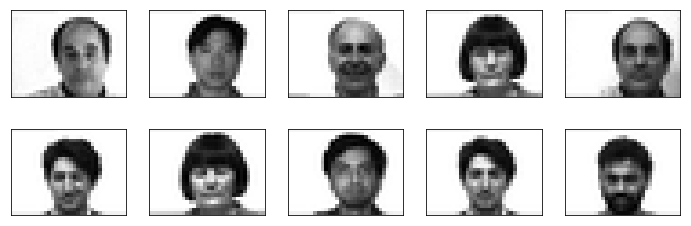

In [10]:
# Plot some examples
fig, ax = plt.subplots(2, 5, figsize=(12, 4))
ax = ax.flatten()
for i_example in range(len(ax)):
    ax[i_example].imshow(X[:, i_example*10].reshape((sz)), cmap="gray")
    ax[i_example].set_xticks([], [])
    ax[i_example].set_yticks([], [])

In [11]:
# Standardise data to zero mean and unit variance. We are doing this manually here as we need 
# mu and sigma to revert this operation (add mu, multiply by sigma) when 
# visualizing the resulting reconstructed faces. 

mu = X.mean(axis=1)
sigma = X.std(axis=1)

X -= np.expand_dims(mu, 1)
X /= np.expand_dims(sigma, 1)

In [12]:
# Split dataset in training, validation, and testing split
X_train = X[:, :100]
X_val = X[:, 100:140]
X_test = X[:, 140:]

# Print dimensions
print("Dimensions training inputs: {}".format(X_train.shape))
print("Dimensions validation inputs: {}".format(X_val.shape))
print("Dimensions testing inputs: {}".format(X_test.shape))

Dimensions training inputs: (768, 100)
Dimensions validation inputs: (768, 40)
Dimensions testing inputs: (768, 25)


### Exercise 7: Running autoencoder training (0.5 points)
Now that we have done all the work, we can finally run the autoencoder to learn reconstructing faces. 

1. Train your network on the training dataset `X_train`, and validate it at each epoch on the test set `X_val`. Use de default values for the number of hidden units, learning rate, and number of epochs.
1. After training, plot the train and validation losses over epochs (as returned by `train_network()`.

### Solution 7

Epoch 1/2000. Train loss: 413.923. Validation loss: 393.089.
Epoch 51/2000. Train loss: 208.861. Validation loss: 220.346.
Epoch 101/2000. Train loss: 152.678. Validation loss: 174.538.
Epoch 151/2000. Train loss: 126.600. Validation loss: 151.091.
Epoch 201/2000. Train loss: 111.307. Validation loss: 138.665.
Epoch 251/2000. Train loss: 99.890. Validation loss: 129.821.
Epoch 301/2000. Train loss: 90.626. Validation loss: 122.842.
Epoch 351/2000. Train loss: 82.637. Validation loss: 116.757.
Epoch 401/2000. Train loss: 75.846. Validation loss: 111.521.
Epoch 451/2000. Train loss: 70.075. Validation loss: 107.187.
Epoch 501/2000. Train loss: 65.248. Validation loss: 103.875.
Epoch 551/2000. Train loss: 61.269. Validation loss: 101.497.
Epoch 601/2000. Train loss: 57.956. Validation loss: 99.817.
Epoch 651/2000. Train loss: 55.130. Validation loss: 98.607.
Epoch 701/2000. Train loss: 52.677. Validation loss: 97.703.
Epoch 751/2000. Train loss: 50.521. Validation loss: 96.980.
Epoch 801/

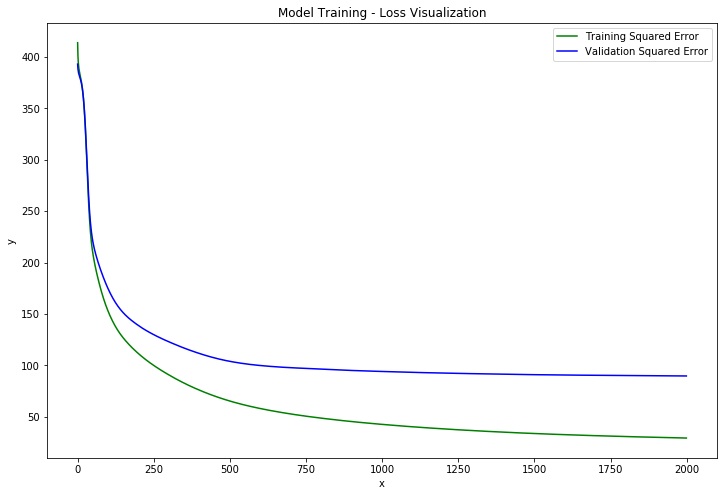

In [13]:
epochs = 2000

# Train the network
W1, W2, train_loss, val_loss = train_network(X_train, X_val, n_hidden=30, n_epochs=epochs, eta=10**-5)

# Plot the training and validation losses
plt.figure(figsize=(12,8))
plt.plot(np.arange(0, epochs, 1), train_loss, 'g-', label='Training Squared Error')
plt.plot(np.arange(0, epochs, 1), val_loss, 'b-', label='Validation Squared Error')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Training - Loss Visualization')
plt.legend(loc='best')
plt.show()

### Exercise 8: Reconstruction (1 point)

Choose 5 faces from the set, and plot their original and their reconstructed image side-by-side. That is, plot a chosen face and the output your trained autoencoder (represented by the weights) creates for it.

Use [`np.reshape`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html) to reshape pixel values for the input and output images to their original dimensions `sz` in a 2D array. Then make use of [`plt.imshow()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html) with a `gray` colormap to show the faces. 

You need to revert the scaling operation by multiplying by `sigma` and adding the `mean` (both previously computed) on each `x` and `y` (If you don't, your real and reconstructed images will be off, e.g. too dark.). Think carefully about whether you have to do this before or after passing the images through your network!

### Solution 8

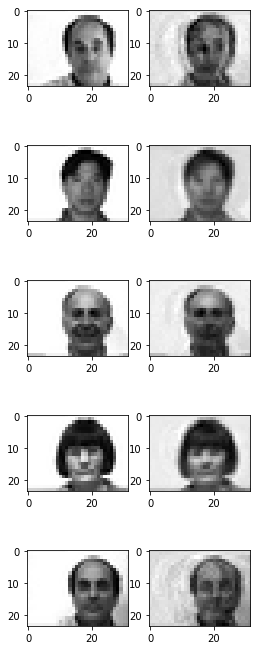

In [14]:
# Open a 5-by-2 figure with plt.subplots
## Code here ##
fig, ax = plt.subplots(5, 2, figsize=(4, 12))
ax = ax.flatten()

#for i_example in range(len(ax)/2):
 #   ax[i_example].imshow(X[:, i_example*10].reshape((sz)), cmap="gray")
  #  ax[i_example].set_xticks([], [])
   # ax[i_example].set_yticks([], [])

#forward pass
A1, H, Y = forward(X, W1, W2)
X *= np.expand_dims(sigma, 1)
X += np.expand_dims(mu, 1)
Y *= np.expand_dims(sigma, 1)
Y += np.expand_dims(mu, 1)


# Loop over 5
## Write code here ##
for i_example in range(5):
    
    # Take a new example from X (the autoencoder input)
    ## Code here ##
    im = X[:, i_example*10]
    
    # Forward pass of X through the network, obtain the reconstruction y
    imY = Y[:, i_example*10]
    
    # Plot the original X
    ax[i_example*2].imshow(im.reshape((sz)), cmap="gray")
    
    # Plot the reconstructed X (output Y)
    ax[i_example*2+1].imshow(imY.reshape((sz)), cmap="gray")


### Exercise 9: Weights and receptive fields (1 point)
We can visualize what was learned during classification and by the autoencoder. During training, the hidden units have become pattern detectors that you can interpret as *receptive fields*. 

You should visualize both `W1` and `W2`. To visualize the learned pattern of a single unit $i$, use [`np.reshape`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html) to reshape the weights leading from all image pixels to unit $i$ into a 2D array. Then make use of [`plt.imshow()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html) with a `gray` colormap to show the learned pattern.

### Solution 9

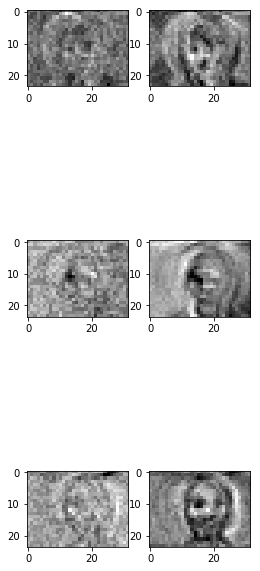

In [15]:
#X  = [P N] data matrix of P inputs for N examples
#W1 = [Q P] weight matrix of the first layer from P input pixels to Q outputs
#W2 = [P Q] weight vector of the second layer of Q inputs to P output pixels

# Visualize W1
## Code here ##
fig, ax = plt.subplots(3, 2, figsize=(4, 12))
ax = ax.flatten()

ax[0*2].imshow(W1[0].reshape((sz)), cmap="gray")
ax[1*2].imshow(W1[1].reshape((sz)), cmap="gray")
ax[2*2].imshow(W1[2].reshape((sz)), cmap="gray")

# Visualize W2
## Code here ##
ax[0*2+1].imshow(W2[:,0].reshape((sz)), cmap="gray")
ax[1*2+1].imshow(W2[:,1].reshape((sz)), cmap="gray")
ax[2*2+1].imshow(W2[:,2].reshape((sz)), cmap="gray")